In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [20]:
A=[]
for a in open("A.dat",'r'):
    A.append(a)

In [21]:
A = np.array(A, dtype=float)
A

array([ 434.605 , 8237.88  , 9223.77  , ...,  966.956 , 2033.92  ,
         11.6837])

In [22]:
len(A)

24910

In [23]:
norm = np.sum(A)
norm

674278290.5084016

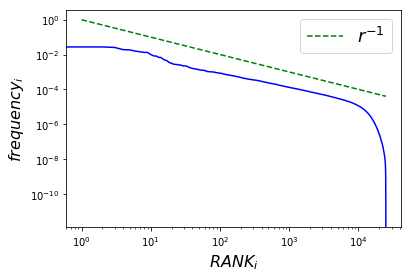

In [24]:
fig = plt.figure()
x = np.arange(1, len(A))
plt.ylabel("$frequency_i$", fontsize=16)
plt.xlabel("$RANK_i$", fontsize=16)
plt.yscale('log')
plt.xscale('log')
#plt.ylim(1e-7,1)
plt.plot(x, 1./x, 'g--', label='$r^{-1}$')
plt.plot(np.sort(A/norm)[::-1], c='blue')
plt.legend(fontsize=18)
plt.show()

In [25]:
fig.savefig("globalzipf.pdf")

# Occurrences distribution

In [26]:
O=[]
for o in open("O.dat",'r'):
    O.append(o)

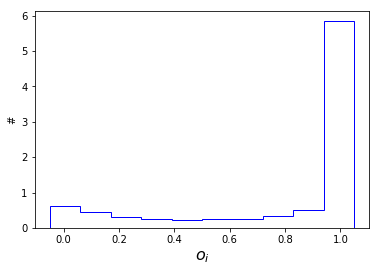

In [27]:
bins = 10
rang = (0-0.5/bins, 1+0.5/bins)
fig=plt.figure()
plt.hist(np.array(O, dtype=float), histtype='step', range = rang, color='blue', density=True)
plt.xlabel("$o_i$", fontsize=16)
plt.ylabel("#")
plt.show()

In [28]:
fig.savefig("globalU.pdf")

# null model

## zipf

In [29]:
A_null=[]
for a in open("A_null.dat",'r'):
    A_null.append(a)

In [30]:
A_null = np.array(A_null[:-1], dtype=float)
len(A_null)

24909

In [31]:
norm_null = np.sum(A_null)
norm_null

654270762.0

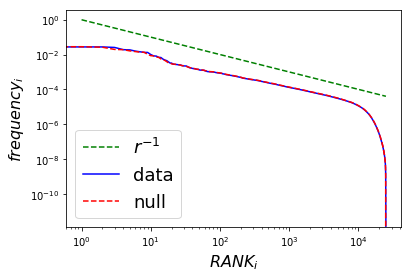

In [32]:
fig = plt.figure()
x = np.arange(1, len(A))
plt.ylabel("$frequency_i$", fontsize=16)
plt.xlabel("$RANK_i$", fontsize=16)
plt.yscale('log')
plt.xscale('log')
#plt.ylim(1e-7,1)
plt.plot(x, 1./x, 'g--', label='$r^{-1}$')
plt.plot(np.sort(A/norm)[::-1], c='blue', label='data')
plt.plot(np.sort(A_null/norm_null)[::-1], c='red', ls='dashed', label='null')
plt.legend(fontsize=18)
plt.show()

In [33]:
fig.savefig("globalzipf_null.pdf")

## occurrences

In [34]:
O_null=[]
for o in open("O_null.dat",'r'):
    O_null.append(o)

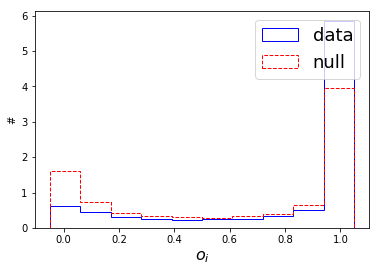

In [35]:
bins = 10
rang = (0-0.5/bins, 1+0.5/bins)
fig=plt.figure()
plt.hist(np.array(O, dtype=float), histtype='step', color='blue', range=rang, density=True, label='data')
plt.hist(np.array(O_null, dtype=float), histtype='step', color='red', ls='dashed', range=rang, density=True, label='null')
plt.xlabel("$o_i$", fontsize=16)
plt.ylabel("#")
plt.legend(fontsize=18)
plt.show()

In [36]:
fig.savefig("globalU_null.pdf")